# 도커(docker)로 한글 패키지가 설치된 주피터 노트북(jupyter notebook) 실행하기

- [참고 사이트](https://teddylee777.github.io/data-science/docker-datascience-notebook/)

### 전체 순서

> 1. 도커 데스크 실행
> 1. 도커 실행 명령(볼륨연결)
> 1. 브라우저로 노트북 연결(localhost:8888)
> 1. 코드 및 실행

도커 데스크탑 실행

docker version

docker run --rm -itd --name notebook1 -p 8888:8888 -v D:\docker\notebook:/home/jovyan/work teddylee777/datascience-notebook:latest

다음으로 브라우저에 연결하면 성공
- http://localhost:8888/tree

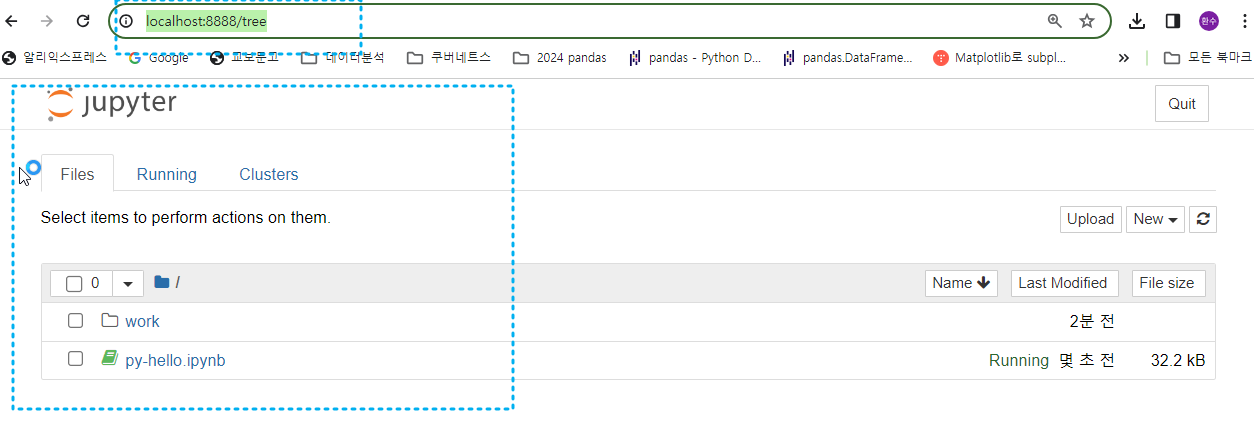

바로 실행되는 폴더는 /home/jovyan/
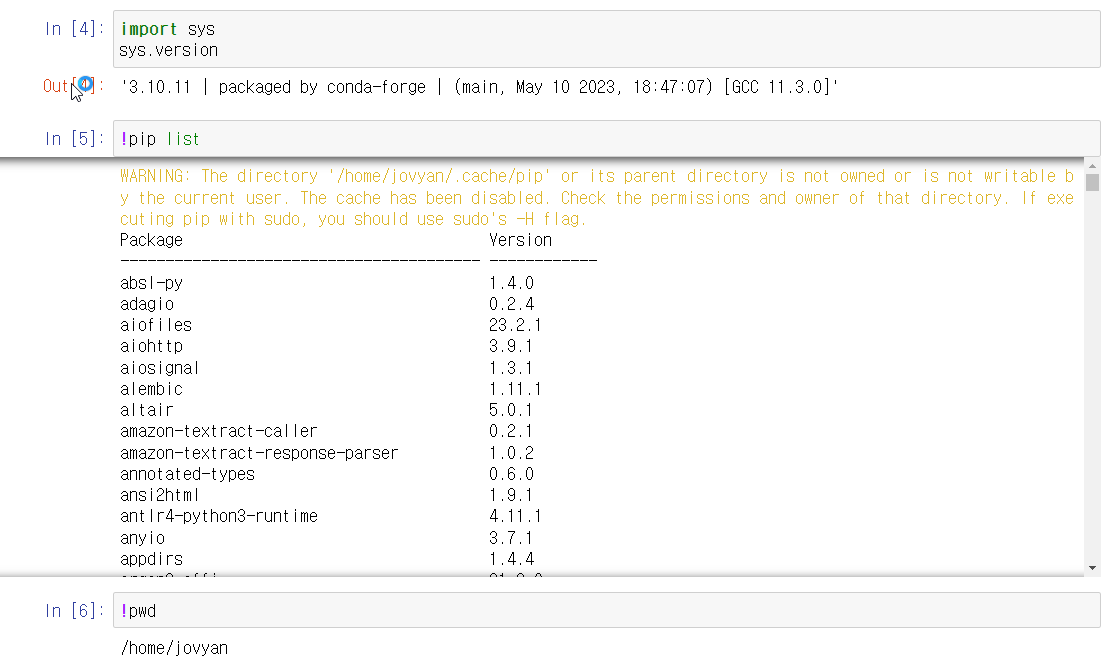

콘테이너와 연결될 볼륨은 work 하부이므로 work로 이동해서 코딩을 해야 함

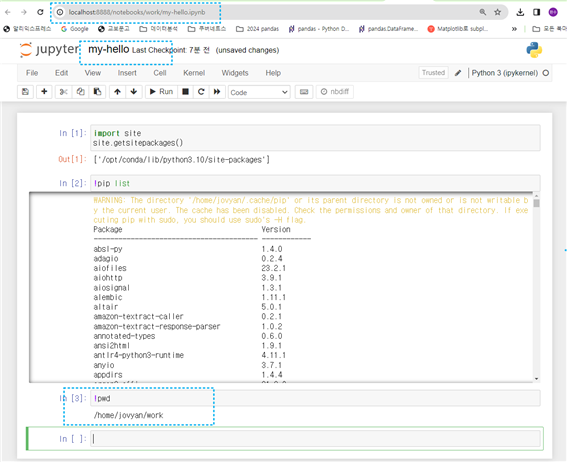

# 콘테이너 내부 들어가기

docker exec -it e903(콘테이너이름 또는 ID) /bin/bash

docker exec -it e903 notebook2(콘테이너 이름)

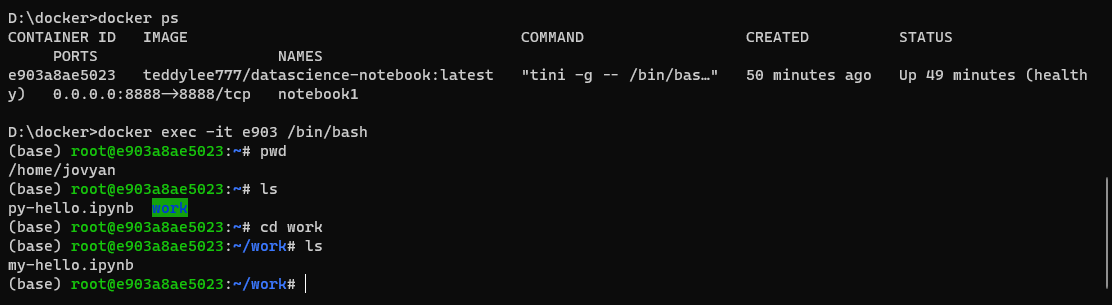

콘테이너 검사

docker inspect <콘테이너이름>
docker inspect notebook1

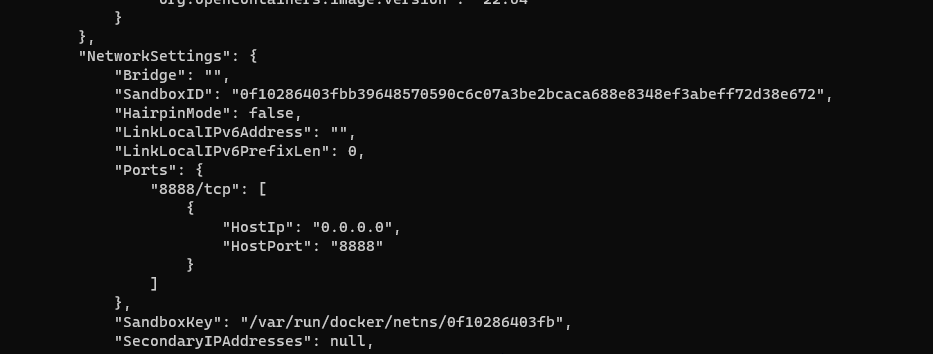

[참고 사이트](https://bioinfoblog.tistory.com/256)

일반 주피터 이미지

[jupyter/datascience-notebook](https://hub.docker.com/r/jupyter/datascience-notebook)

docker pull jupyter/datascience-notebook:latest

docker run --rm -itd --name note -p 8889:8888 -v D:\docker\science-note:/home/jovyan/work jupyter/datascience-notebook

다음으로 시작해도 OK!

docker run -p 8889:8888 --name jupyter -e JUPYTER_ENABLE_LAB=yes -e GRANT_SUDO=yes --user root -v D:\docker\science-note:/home/jovyan jupyter/datascience-notebook:latest

docker run --rm -itd --name note -p 8889:8888 -e JUPYTER_ENABLE_LAB=yes -e GRANT_SUDO=yes --user root -v D:\docker\science-note:/home/jovyan jupyter/datascience-notebook:latest

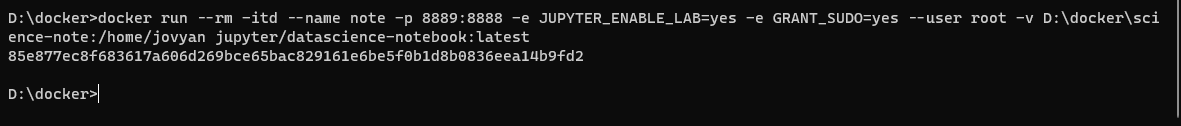

### 도커 설명

$ docker run -p 8888:8888 --name jupyter -e JUPYTER_ENABLE_LAB=yes -e GRANT_SUDO=yes --user root -v [Local 내 작업 Path]:/home/jovyan jupyter/datascience-notebook:latest

# 유용한 명령어
$ docker images # 다운받은 image 확인
$ docker ps # 실행 중인 컨테이너 확인
$ docker ps -a # 종료된 컨테이너 확인
$ docker stop jupyter # 컨테이너 종료
$ docker rm jupyter # 컨테이너 삭제
$ docker rmi jupyter/datasciene-notebook:latest # 이미지 삭제

```
Docker run parameters
--name: container의 이름을 정해주는 것으로 생략 시 random한 이름이 부여된다.
-e JUPYTER_ENABLE_LAB=yes: Jupyter Notebook이 아닌 JupyterLab을 실행해준다.
-e GRANT_SUDO=yes --user root: 기본으로 사용하는 user 이름인 jovyan에 sudo 권한을 부여한다. 프로그램 등을 설치할 때 유용하다 [4].
-v [Local 내 작업 Path]:/home/jovyan/work: 기본적으로 container를 실행한 후 파일을 저장하면 container 내에만 파일이 저장된다. 즉, 로컬에서 container의 파일에 접근할 수 없고, 반대로 container에서 로컬 파일에 접근할 수 없다. 이를 방지하기 위해 폴더를 mount할 수 있는데 위 명령어를 입력하면 container의 /home/jovyan/work와 [Local 내 작업 Path]를 연결할 수 있다.
-i: (참고) interactive 입출력
-t: (참고) 가상 터미널 생성
--rm: (참고) docker run 실행 후 컨테이너 삭제
```

직접 실행

docker exec -it note /bin/bash

들어가서 다음으로 암호 확인 가능

jupyter server list

root@85e877ec8f68:~# jupyter server list
Currently running servers:
http://85e877ec8f68:8888/?token=1419526238917ec1d8f4a8d7d5d3e3998cd579029d1ddffa :: /home/jovyan
root@85e877ec8f68:~#

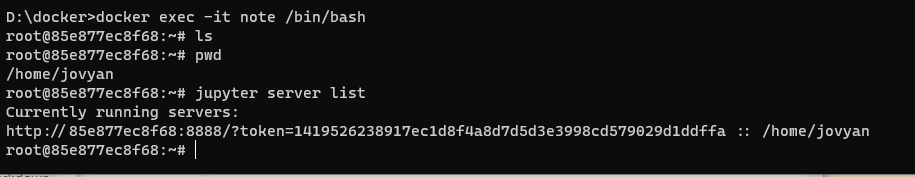

위에서 확인한 암호를 복사해서 붙이기

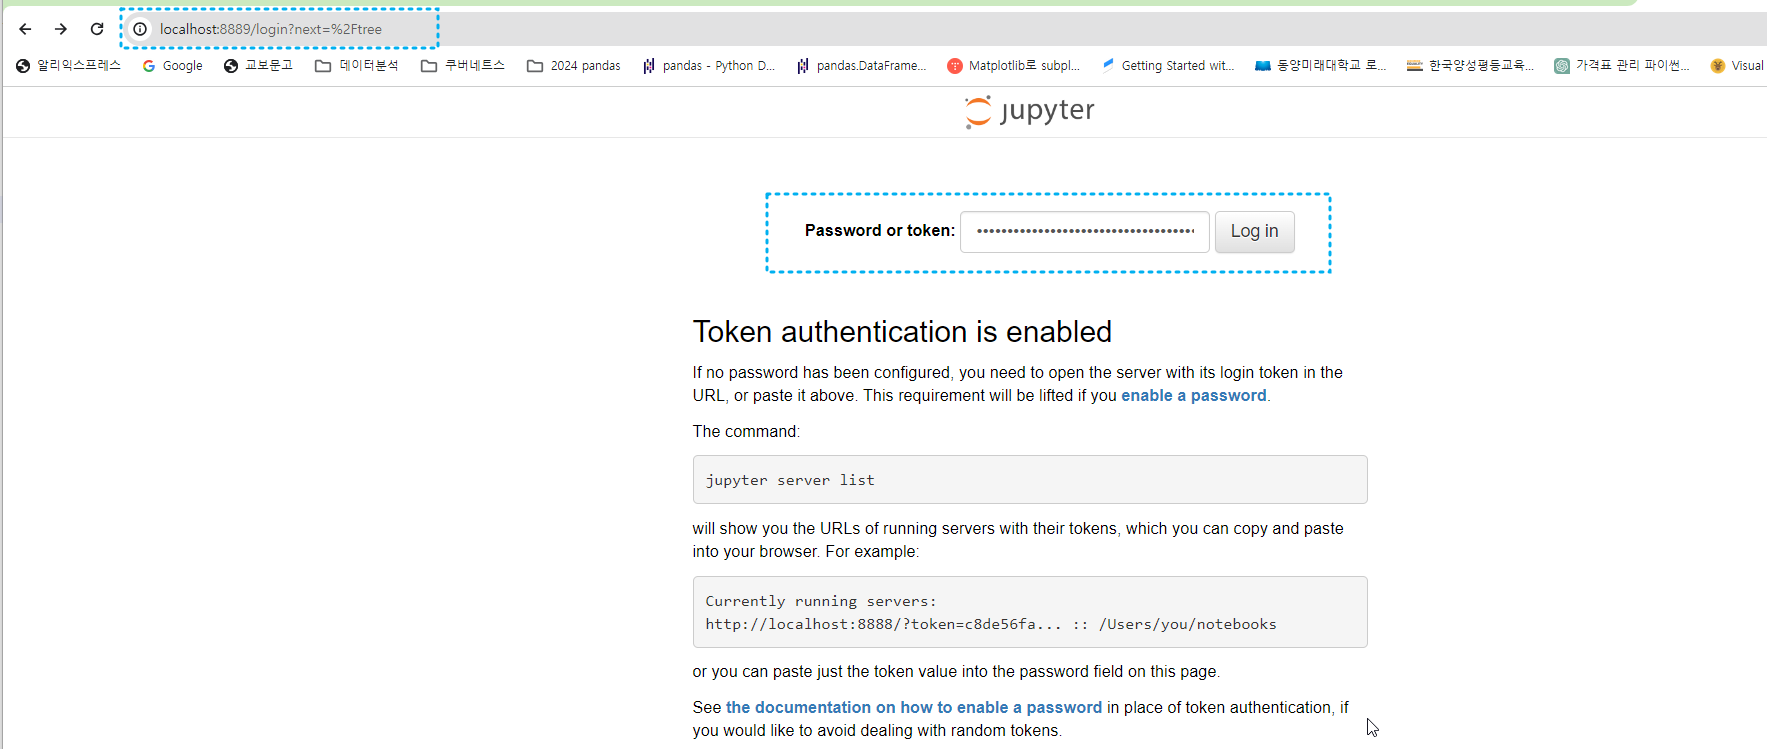

암호를 입력하면 다음으로 접속됨

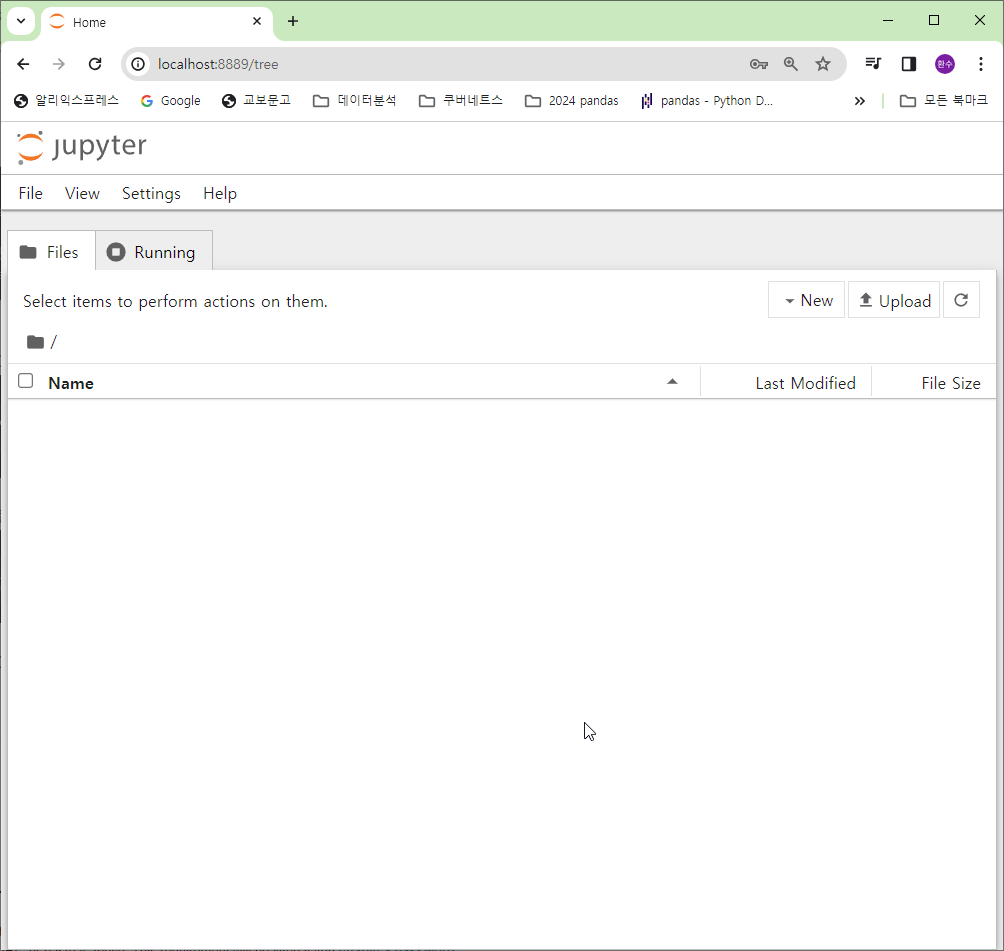

다양한 메뉴

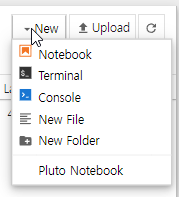

위에서 Notebook을 선택해서 다음으로 코딩

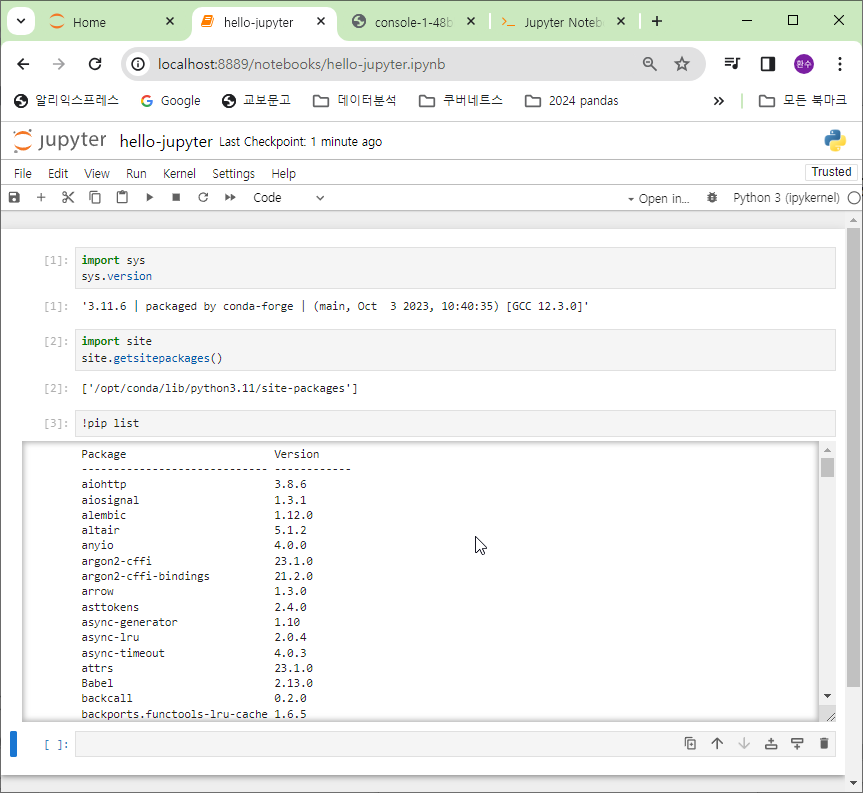

연결된 PC의 폴더 D:\docker\science-note 하부에 위에서 만든 다음 노트북 파일이 생성된 것을 확인 가능

- hello-jupyter.ipynb

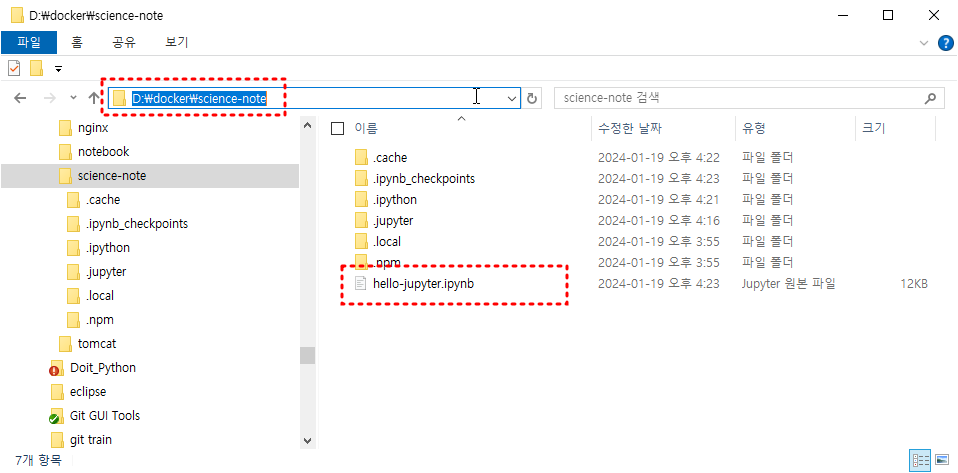

터미널을 실행하면 다음으로 서버에서도 확인 가능

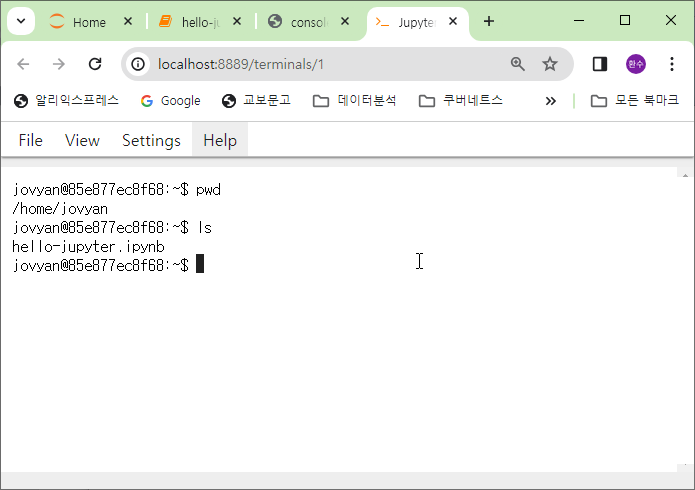

콘솔로 오면 다음으로 실행 가능

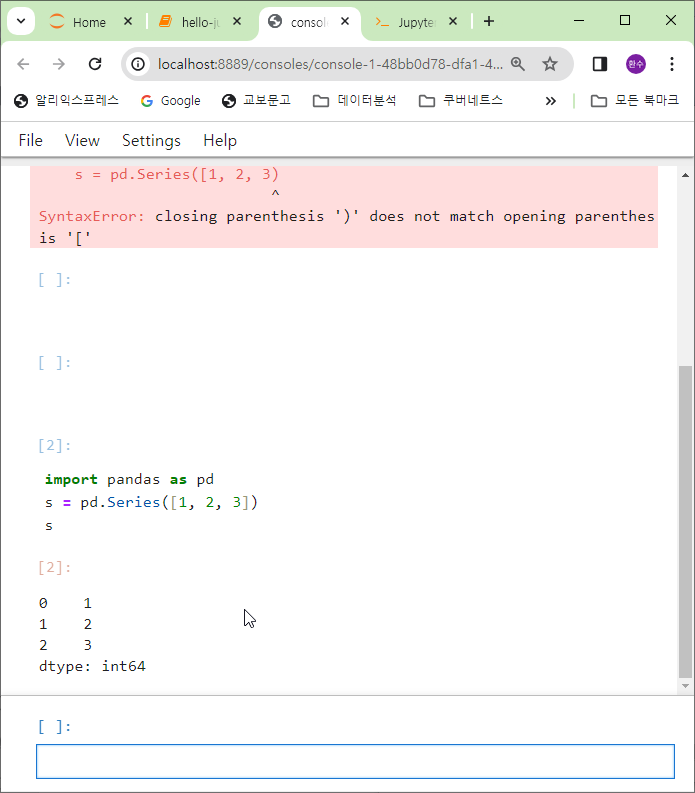